In [1]:
# jupyter tip: when in doubt, restart the kernel and get rid of confusing behavior from running things out of order etc
# the kernel restart options you can clear the kernel and all outputs, rerun all commands, or things in-between
# if it ever seems like your code isn't working and you want to make sure it's not some jupyter side-effect, this conquers all

# note that jupyter notebooks are literally just json files
# which can lead to some pretty fun automation if desired...

# so the lines that start with % are "magic" commands that do various things to affect notebook behavior
# I think this frequently gets treated like voodoo things that people are afraid to change
# but here is what I figured out for some of the common ones

# this line may be unnecessary - it is so plots display inline, but this may now be default
%matplotlib inline

# these two lines are not strictly necessary either, but what they do is allow you to do your editing
# for files you import outside of jupyter notebook and it will automatically reload them if they change
# which can make behavior less baffling
# this is pretty essential if you don't want jupyter notebook as your editor for python files
# with complex behavior
%reload_ext autoreload
%autoreload 2

# more magic: these particular import abbreviations seem kinda standard for this sort of work
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# this is all expanded from https://www.youtube.com/watch?v=wB9C0Mz9gSo

Text(0, 0.5, 'Numbers Squared')

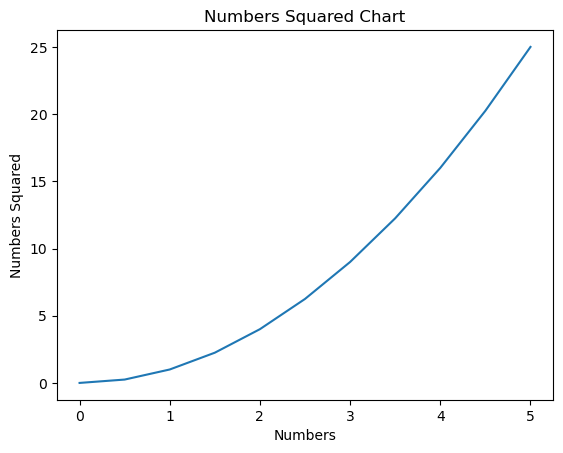

In [2]:
# for x_1 we generate eleven floats from zero to five (this includes endpoints) so you end up with array
# [0, 0.5, 1, 1.5, ... , 5[
x_1 = np.linspace(0,5,11)

# y values are just squares of x values, this is a magical numpy array thing you can't do with vanilla python arrays as easily
y_1 = x_1**2

# so here's the thing for plt, you can set the elements of it in any order
# you basically have the title, xlabel, ylabel, and the plot itself
# these are kind of the bare essentials for producing a plot
# that has any meaning to the viewer but you can eliminate one or more elements
# if any elements are defined then jupyter will assume you want to see the plot with just what you've defined
# the result is a two-dimensional plot with or without labels
# this is kinda nice if you want to plan out your paper and add data later...
# for most basic, title and xlabel and ylabel you give a string, for plot you give x and y arrays and
# it gives you a linear plot of those points
# you're not plotting the function, remember, you're just plotting a chunky line plot that connects the dots you give it
# but you can give it a lot of dots and make it pretty fine if you like...


plt.plot(x_1,y_1)
plt.title('Numbers Squared Chart')
plt.xlabel('Numbers')
plt.ylabel('Numbers Squared')

# if we were not in jupyter notebook we'd need plt.show() to show this plot
# so feel free to do this outside of jupyter notebook if you like

# so far this is sloppy, one-off stuff, but the real way to do
# a 2D plot is to define a figure and axes and work with that

Text(0, 0.5, 'DONGAGE')

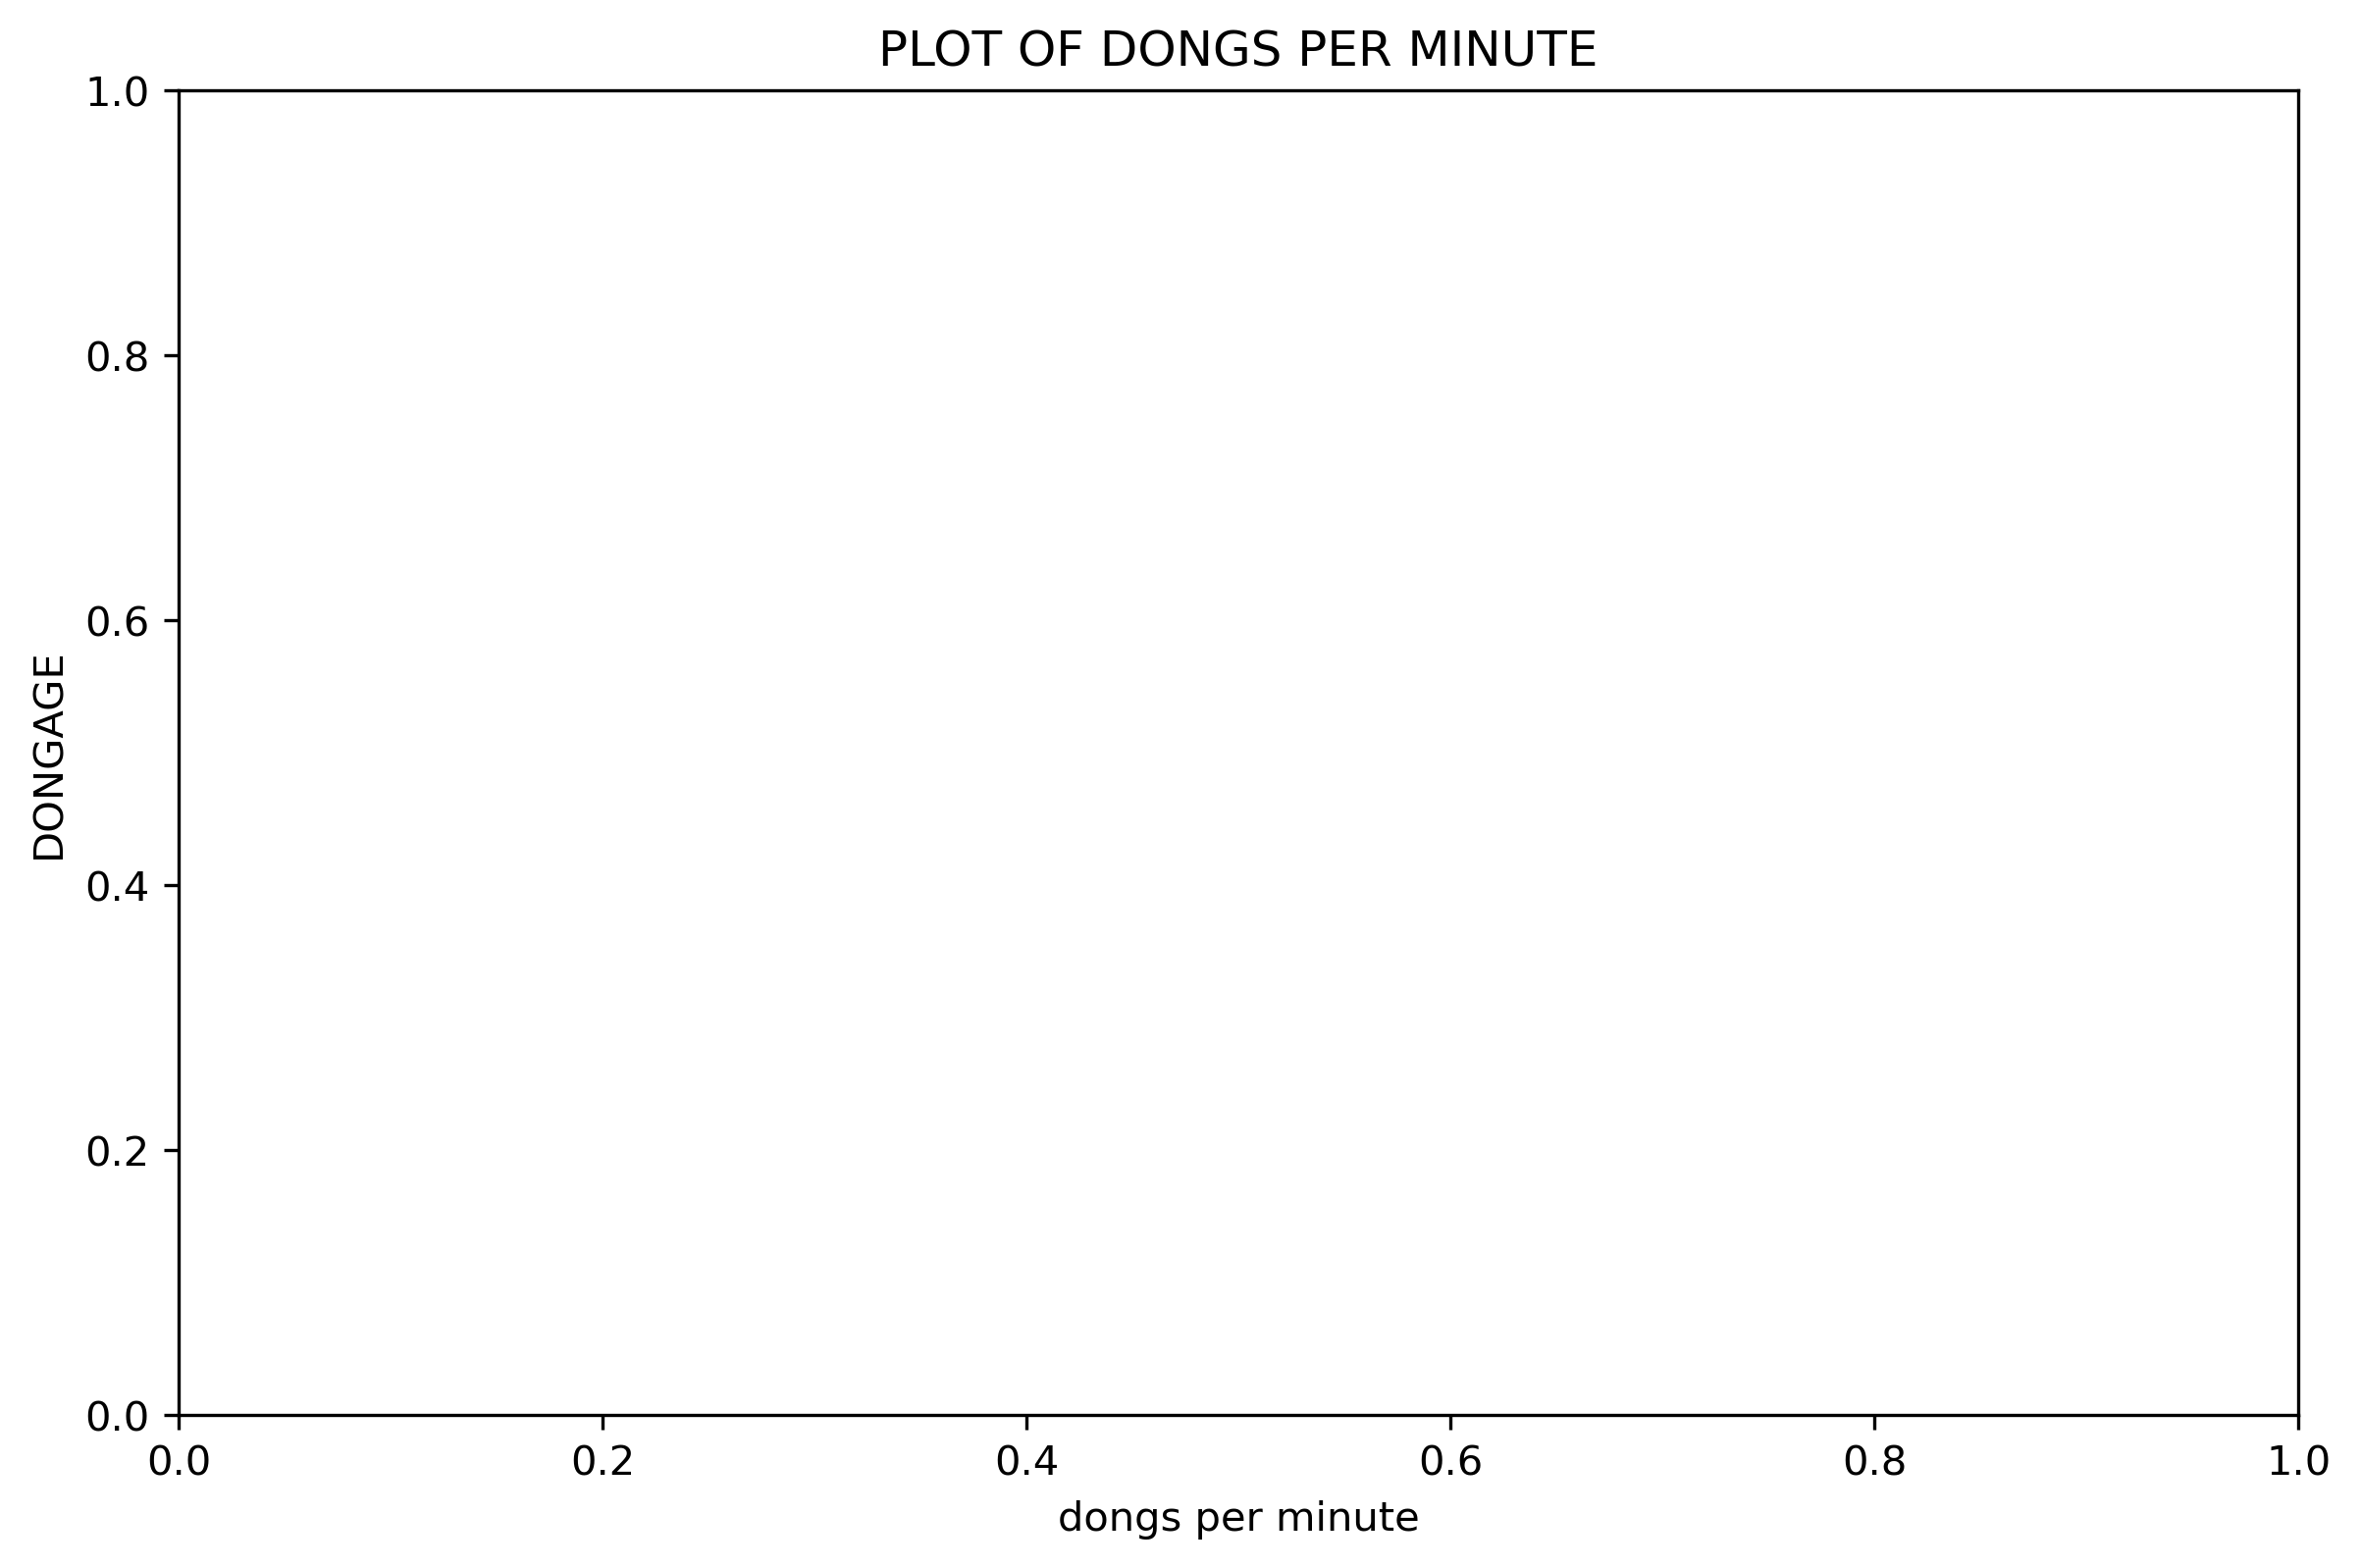

In [8]:
# this seems like standard voodoo magic and right now I can't quite tell what the add_axes margins do
fig1 = plt.figure(figsize=(8,5),dpi=300)
axes1 = fig1.add_axes([0.1,0.1,0.9,0.9])
# these kinda do the same thing
plt.title('PLOT OF DICKS PER SECOND')
axes1.set_title('PLOT OF DONGS PER MINUTE')
plt.xlabel('dicks per second')
axes1.set_xlabel('dongs per minute')
plt.ylabel('DICKAGE')
axes1.set_ylabel('DONGAGE')

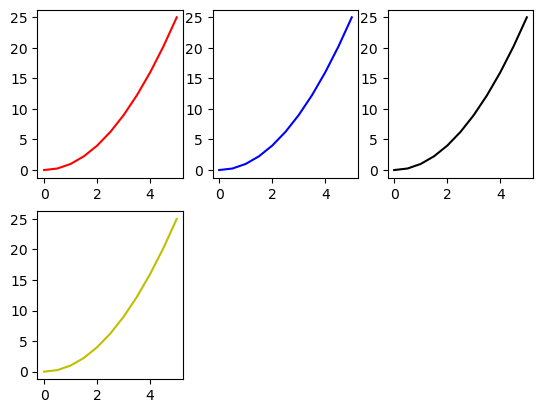

In [32]:
# subplot lets you do multiple plots: subplot(rows, cols, index)
# here we see two rows three columns up to index 4
# you can mix and match row/col for surprising and stupid behavior if desired
# print multiple plots
# this is a dumb way to do this, see below for better
plt.subplot(2,3,1)
# plot subplot in red
plt.plot(x_1,y_1,'r')
plt.subplot(2,3,2)
# plot subplot in blue
plt.plot(x_1,y_1,'b')
plt.subplot(2,3,3)
# plot subplot in black
plt.plot(x_1,y_1,'k')
plt.subplot(2,3,4)
# plot subplot in yellow
plt.plot(x_1,y_1,'y')

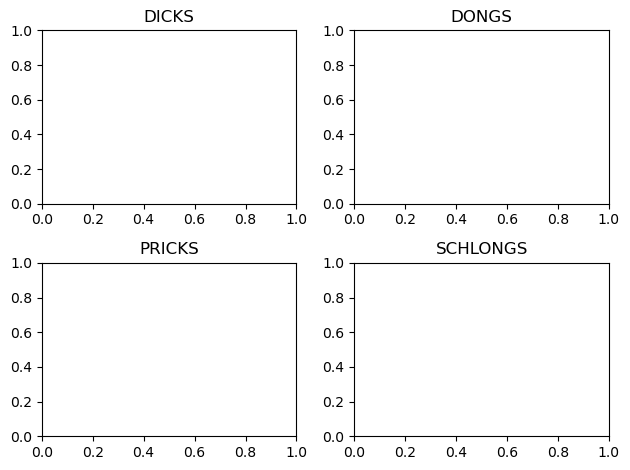

In [48]:
# okay here's the deal, figures and axes are probably a better way of dealing with this crap
# here we create a figure with four subplots, each a different set of axes
# to obscure syntax the fucking commas are optional, thanks
# put them for clarity and to save someone else's sanity
# add_subplot(rows, cols, index)
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.title.set_text('DICKS')
ax2.title.set_text('DONGS')
ax3.title.set_text('PRICKS')
ax4.title.set_text('SCHLONGS')
# more voodoo shit to keep axes from overlapping titles
plt.tight_layout()

# if you need tighter control over where these subplots get placed you can use add_axes instead
# but often it's best just to let matplotlib take care of this crap
# either way the output of adding one of these things will be an Axes object that is placed at
# some appropriate place within the figure which you can fine-tune if necessary
# The degenerate case of this is a figure containing one plot which is a single subplot
# which is an Axes object
# so get used to making the figure, making one or more axes within the figure
# and then adjusting parameters of the axes accordingly

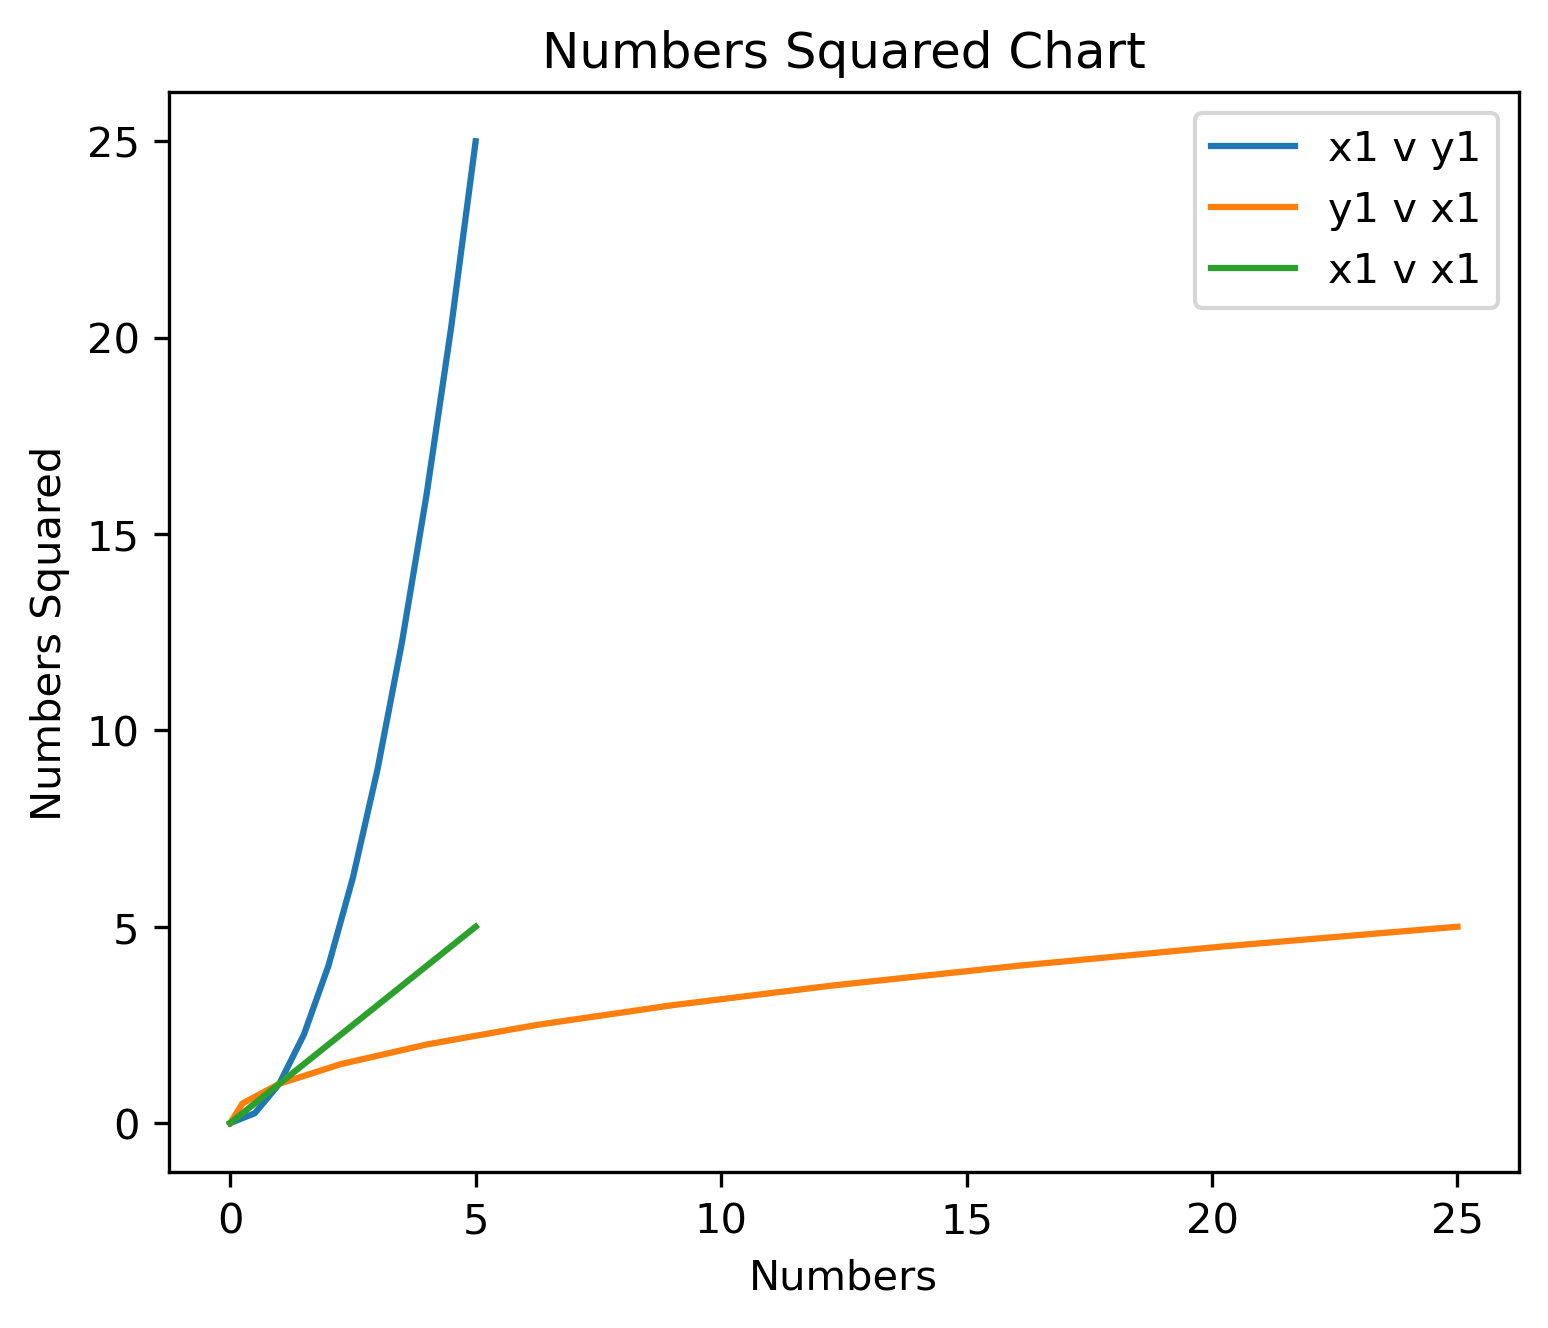

In [77]:
# here's an example where we directly add the axes to the figure and give it padding
# we allocate 5x4 for the figure then add axes with a buffer
fig_1 = plt.figure(figsize=(5,4),dpi=300)
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])
# we could have done any of the following with less control
#axes_1 = fig_1.add_subplot(1,1,1)
#axes_1 = fig_1.add_subplot(111)
#axes_1 = fig_1.add_subplot()
axes_1.set_xlabel('Numbers')
axes_1.set_ylabel('Numbers Squared')
axes_1.set_title('Numbers Squared Chart')
# the label is optional but it allows the legend to happen
# note how you have one xlabel ylabel title for an axes but you can plot multiple things on it
axes_1.plot(x_1,y_1,label='x1 v y1')
axes_1.plot(y_1,x_1,label='y1 v x1')
axes_1.plot(x_1,x_1,label='x1 v x1')
axes_1.legend(loc=0)

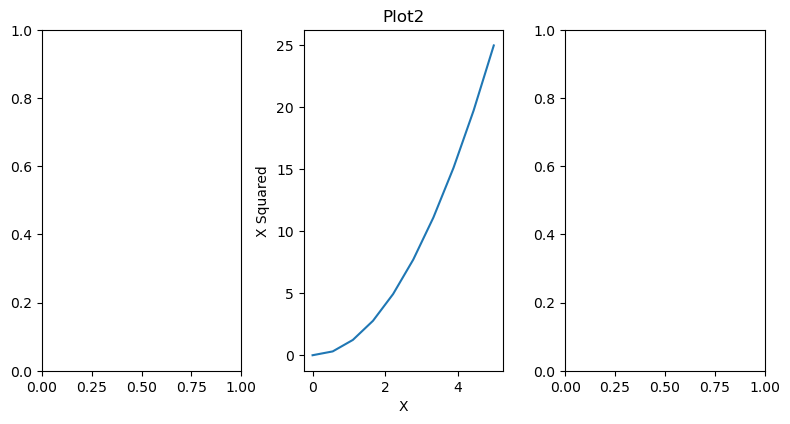

In [5]:
fig_2, axes_2 = plt.subplots(figsize=(8,4), nrows=1, ncols=3)
plt.tight_layout()
axes_2[1].set_title('Plot2')
axes_2[1].set_xlabel('X')
axes_2[1].set_ylabel('X Squared')
axes_2[1].plot(x_1,y_1)

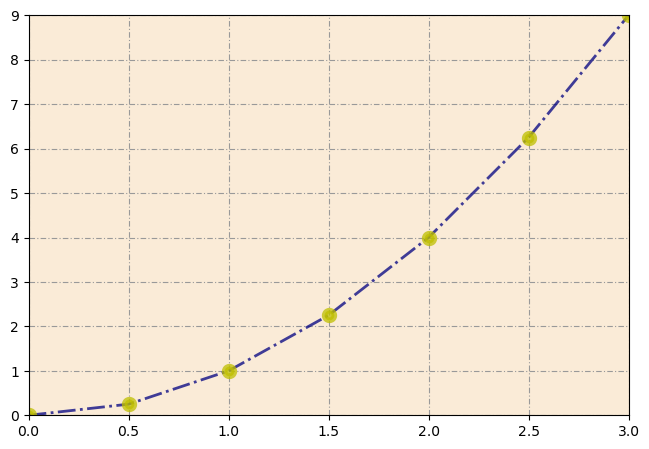

In [78]:
# Appearance Options
# Default colors (b: blue, g: green, c: cyan, m: magenta,
# y: yellow, k: black, w: white)
# color="0.75" creates 75% gray
# you can use hexcodes color="eeefff"
# you can use color names found next like this color="burlywood"
# https://en.wikipedia.org/wiki/Web_colors
#
# ls linestyles at https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
fig_3 = plt.figure(figsize=(6,4))
axes_3 = fig_3.add_axes([0,0,1,1])
axes_3.plot(x_1,y_1, color='navy', alpha=.75, lw=2, ls='-.', marker='o', markersize=7,
            markerfacecolor='y', markeredgecolor='y', markeredgewidth=4)

axes_3.set_xlim([0,3])
axes_3.set_ylim([0,9])

axes_3.grid(True, color='0.6', dashes=(5,2,1,2))

axes_3.set_facecolor('#FAEBD7')

In [7]:
# here is how to save your figures to a file
fig_3.savefig('thirdplot.png')

<BarContainer object of 12 artists>

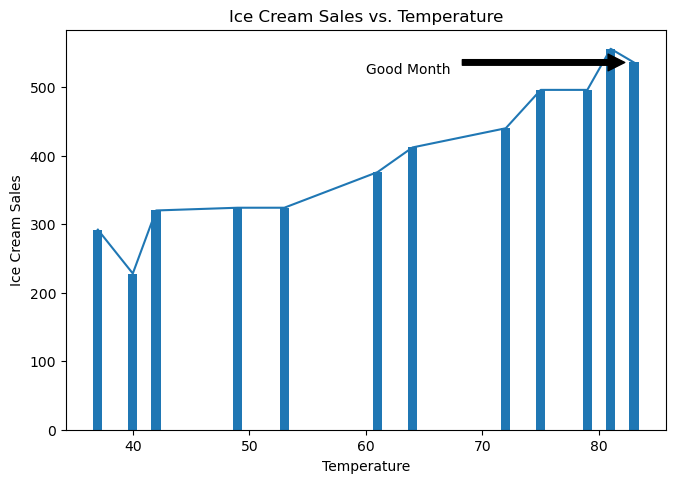

In [8]:
# Pandas
# read up on pandas dataframes and numpy arrays and how and why you may use each
# it would be nice if I had wifi available to do this right now but I do not

ics_df = pd.read_csv('icecreamsales.csv')
ics_df = ics_df.sort_values(by="Temperature")

#ics_df  # show ics values_

np_arr = ics_df.values

np_arr
x_2 = np_arr[:,0]
y_2 = np_arr[:,1]

# Simplest:
#fig_4 = plt.plot(x2_arr,y2_arr)
# allocate size of figure
fig_4 = plt.figure(figsize=(6,4))
# the 0,0,1,1 takes up all space
axes_4 = fig_4.add_axes([0,0,1,1])
axes_4.set_xlabel('Temperature')
axes_4.set_ylabel('Ice Cream Sales')
axes_4.set_title('Ice Cream Sales vs. Temperature')
axes_4.plot(x_2,y_2)

axes_4.annotate('Good Month', xy=(83,536), xytext=(60,520), arrowprops=dict(facecolor='black', shrink=0.05))
plt.bar(x_2,y_2)

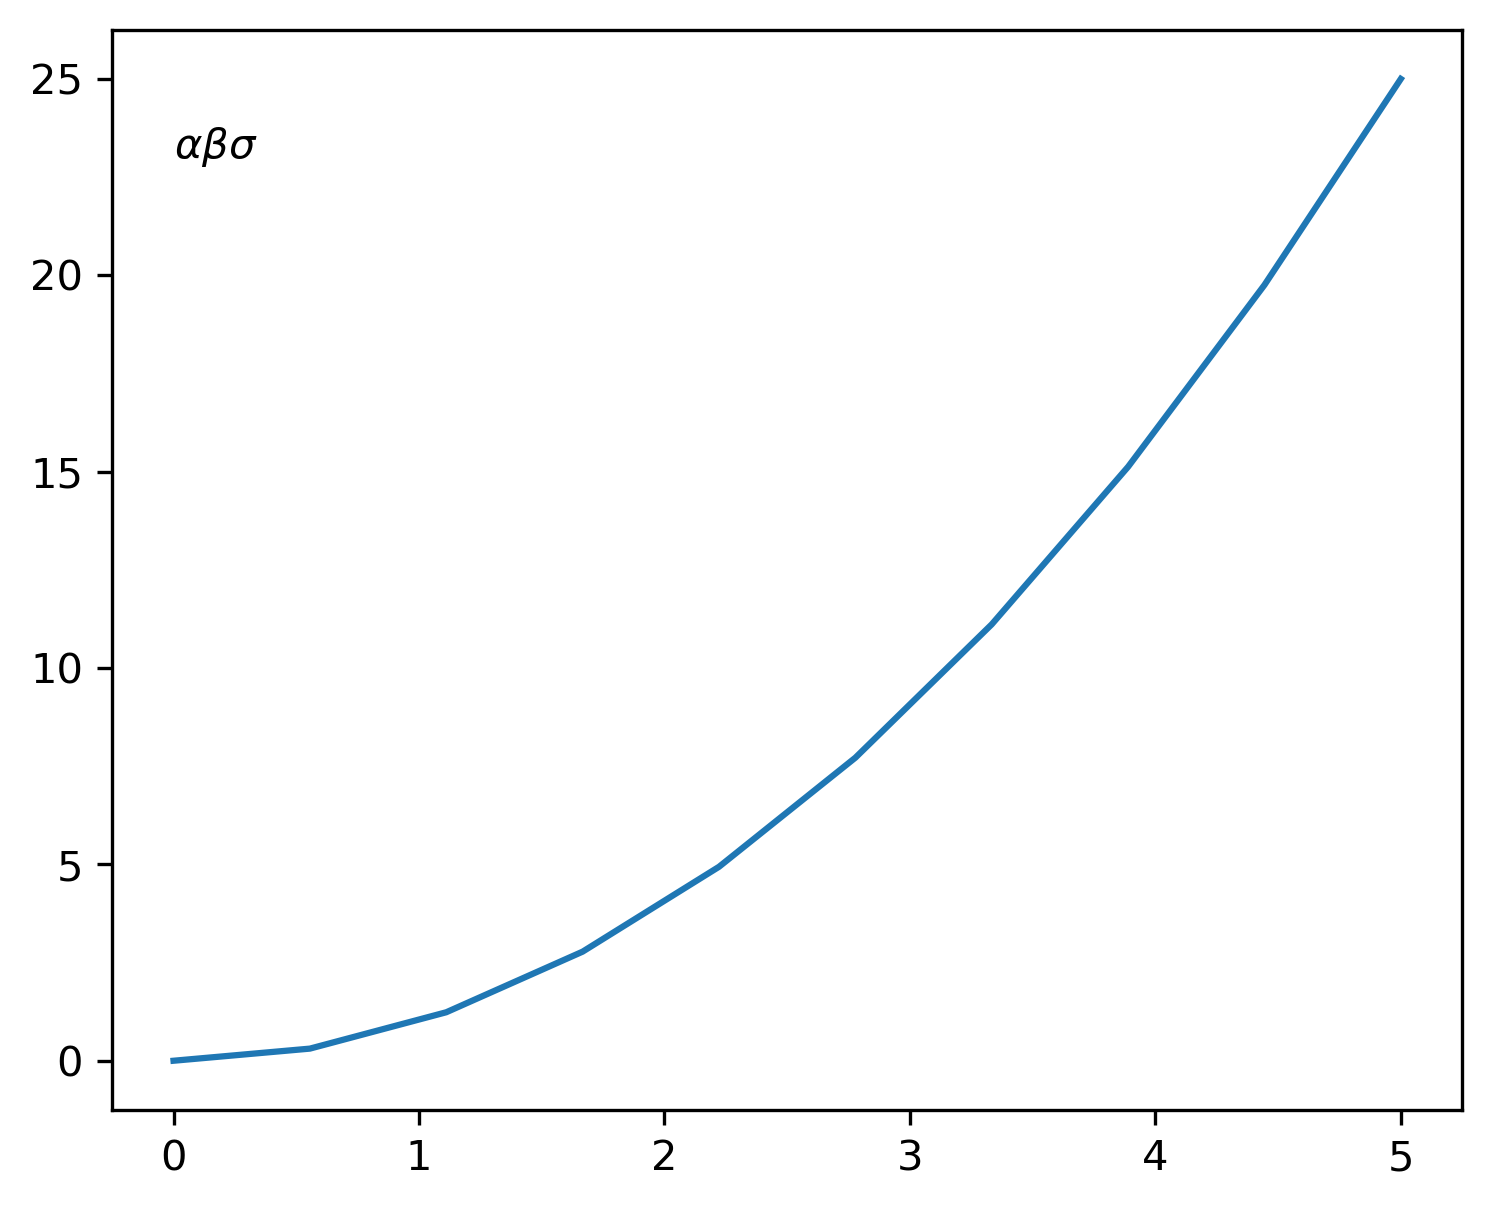

In [9]:
# TeX markup
fig_5 = plt.figure(figsize=(5,4), dpi=300)
axes_5 = fig_5.add_axes([0.1,0.1,0.9,0.9])

axes_5.text(0,23,r'$\alpha \beta \sigma$')

axes_5.plot(x_1,y_1)

(array([0.0297 , 0.06314, 0.08998, 0.12408, 0.16456, 0.17314, 0.15268,
        0.11792, 0.09152, 0.06446, 0.02882]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

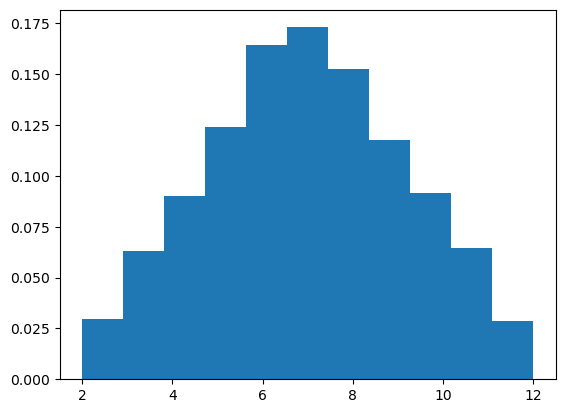

In [10]:
arr_1 = np.random.randint(1,7,5000)
arr_2 = np.random.randint(1,7,5000)
arr_3 = arr_1 + arr_2

# simplest
#plt.hist(arr_3)
plt.hist(arr_3, bins=11, density=True, stacked=True)

# Range gets tuple with bin range interested in
# cumulative=True use a cumulative distribution
# histtype='step' generates a line plot, i.e. not filled
# orientation='horizontal'
# color='orange' change bar color

<BarContainer object of 7 artists>

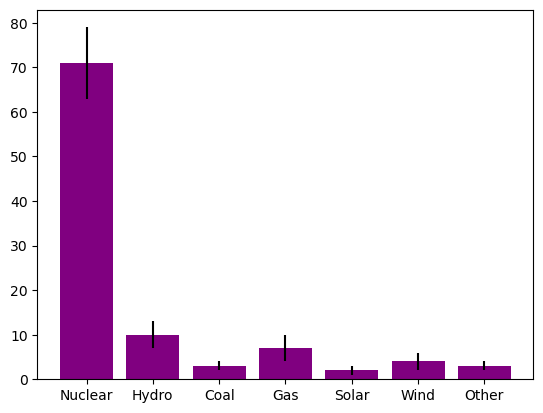

In [11]:
# Bar Charts
# Where France Gets Its Electricity
x = ['Nuclear', 'Hydro', 'Coal', 'Gas', 'Solar', 'Wind', 'Other']
per_1 = [71, 10, 3, 7, 2, 4, 3]
variance = [8, 3, 1, 3, 1, 2, 1]
# Simplest
#plt.bar(x, per_1)
plt.bar(x, per_1, color='purple', yerr=variance)

# also note plt.barh gives horizontal bar chart instead


([<matplotlib.axis.XTick at 0x7f75ae16e2f0>,
 [Text(0.225, 0, 'Aero'),
  Text(1.225, 0, 'Chem'),
  Text(2.225, 0, 'Civil'),
  Text(3.225, 0, 'Elec'),
  Text(4.225, 0, 'Mech')])

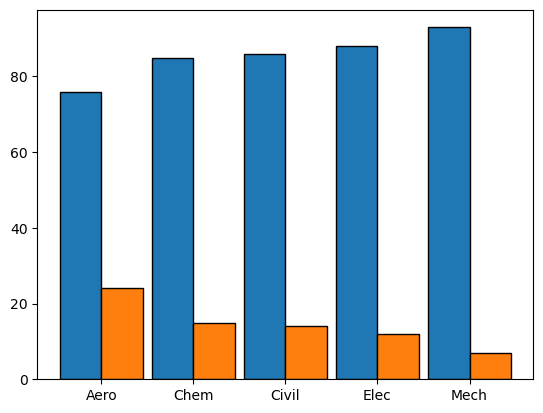

In [12]:
# Percentages of males and females in branches of engineering
m_eng = (76, 85, 86, 88, 93)
f_eng = (24, 15, 14, 12, 7)

spc = np.arange(5)

plt.bar(spc, m_eng, width=0.45, label='Male', edgecolor='k')
plt.bar(spc + 0.45, f_eng, width=0.45, label='Female', edgecolor='k')
plt.xticks(spc + 0.45 /2, ('Aero', 'Chem', 'Civil', 'Elec', 'Mech'))

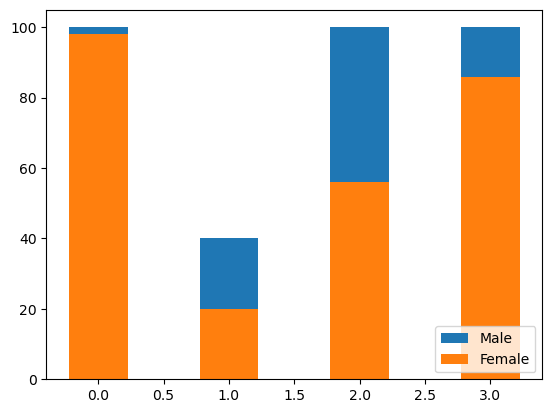

In [13]:
t_type = ['Kind', 'Elem', 'Sec', 'Spec']
m_teach = np.array([2, 20, 44, 14])
f_teach = np.array([98, 20, 56, 86])
ind = [x for x, _ in enumerate(t_type)]
plt.bar(ind, m_teach, width=0.45, label='Male', bottom=f_teach)
plt.bar(ind, f_teach, width=0.45, label='Female')
plt.legend(loc='lower right')

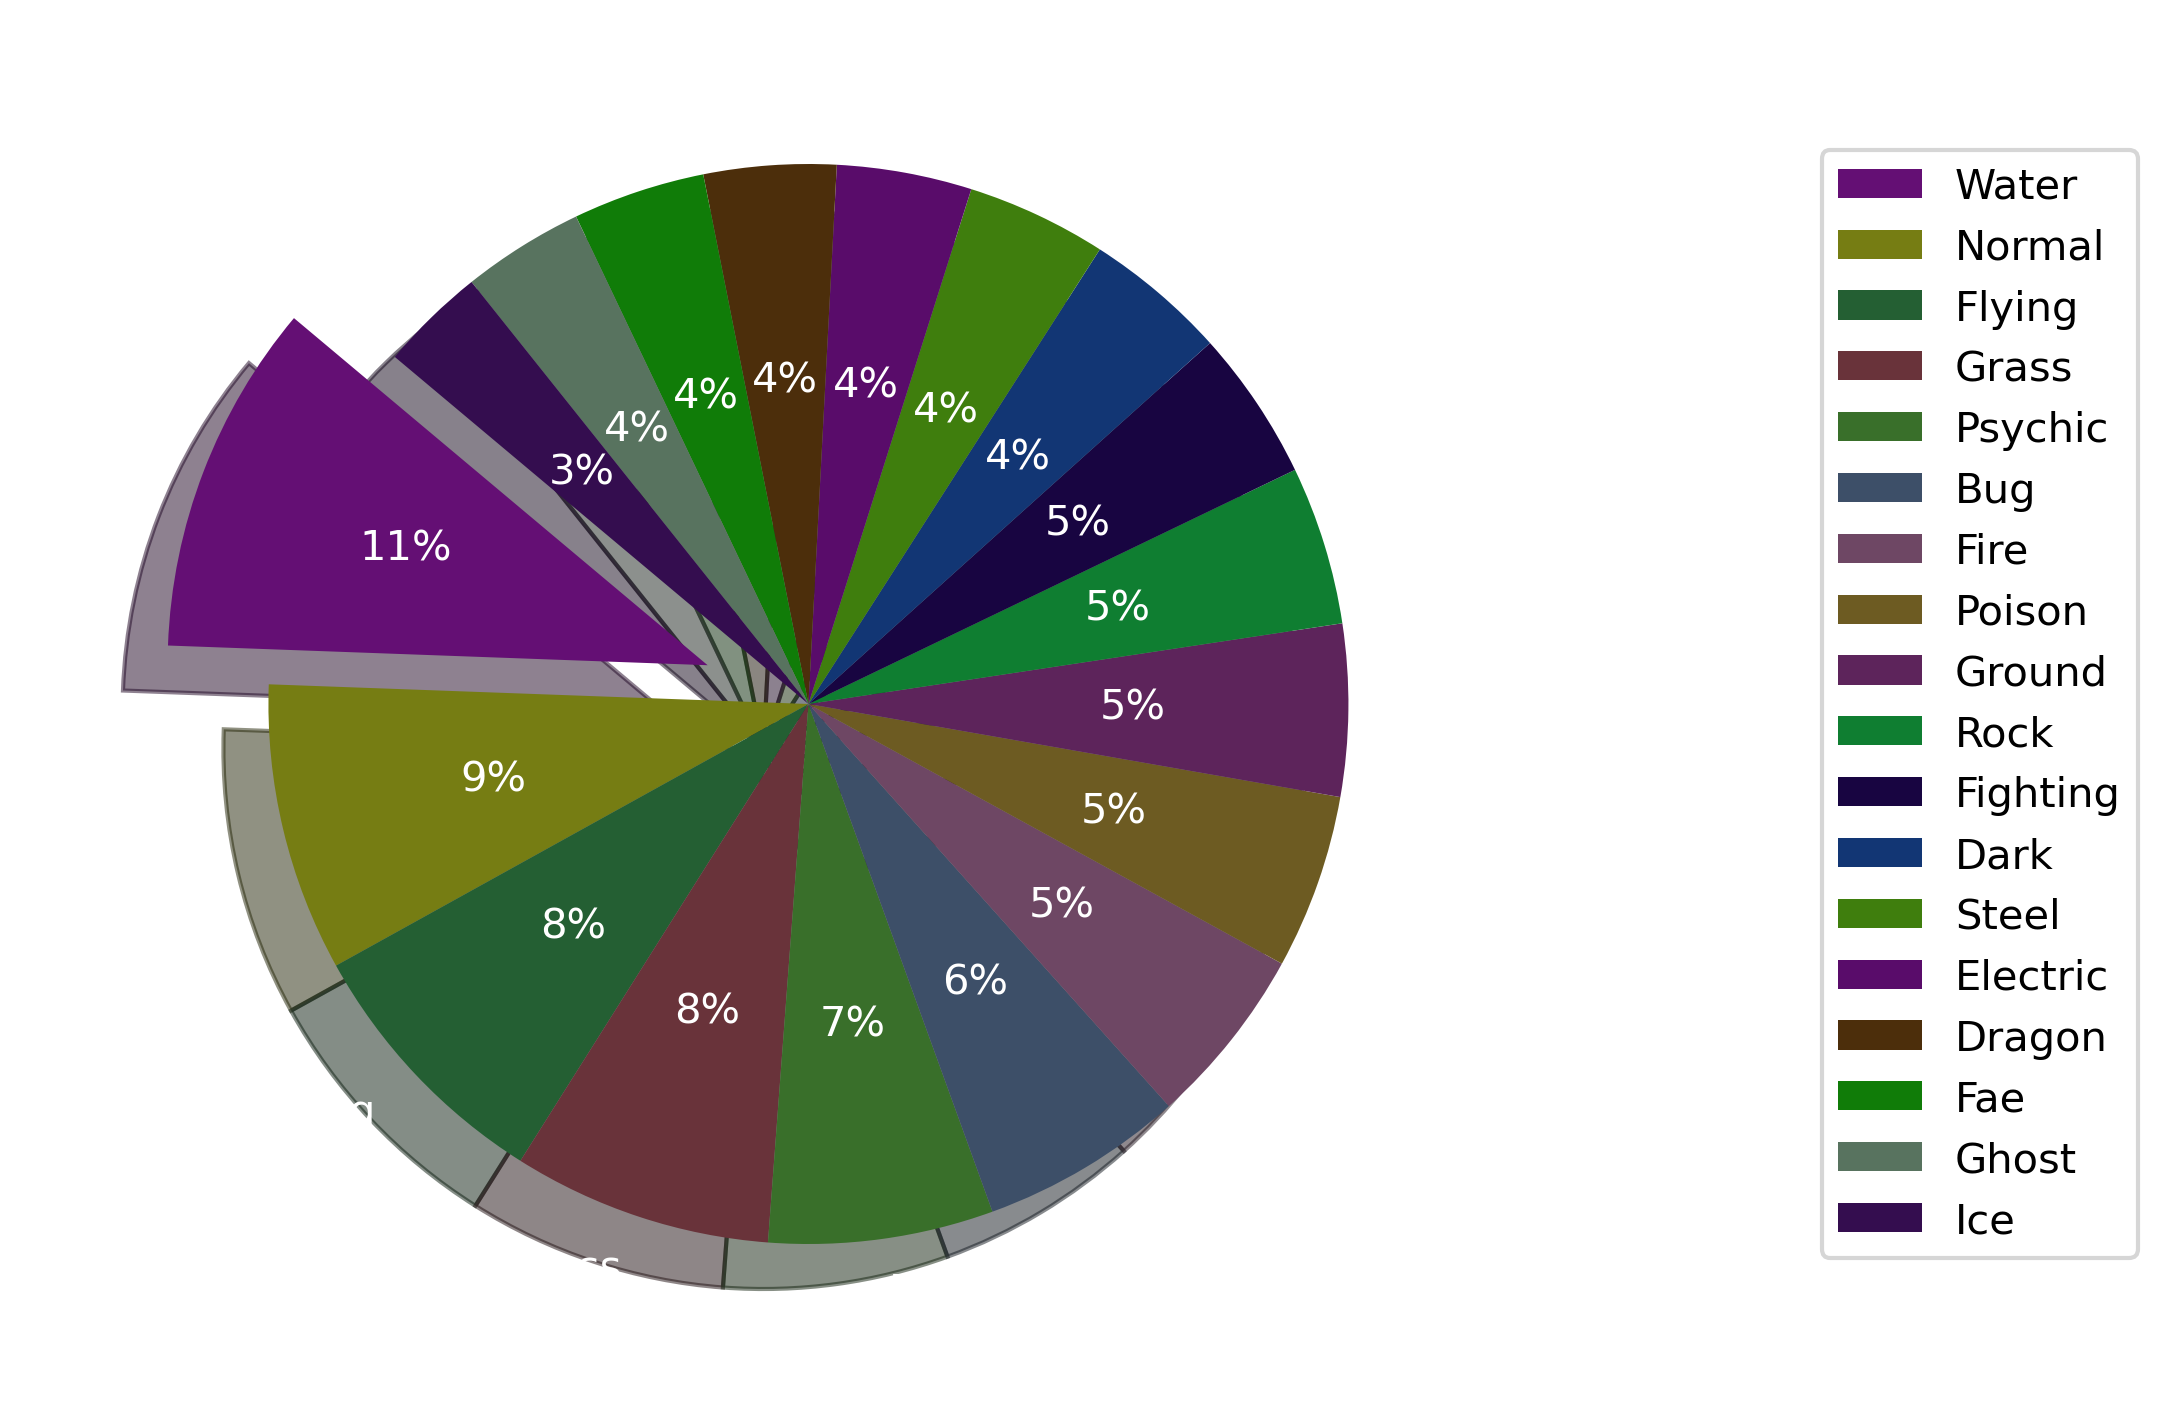

In [14]:
# Pie Charts

import random

fig_6 = plt.figure(figsize=(8,5), dpi=300)
axes_6 = fig_6.add_axes([0.1, 0.1, 0.9, 0.9])

# Create a pie chart of Pokemon by type

types = ['Water', 'Normal', 'Flying', 'Grass', 'Psychic', 'Bug', 'Fire', 'Poison',
         'Ground', 'Rock', 'Fighting', 'Dark', 'Steel', 'Electric', 'Dragon', 'Fae',
         'Ghost', 'Ice']
poke_num = [133, 109, 101, 98, 85, 77, 68, 66, 65, 60, 57, 54, 53, 51, 50, 50, 46, 40]

colors = []
for i in range(18):
    rgb = (random.uniform(0, .5), random.uniform(0, .5), random.uniform(0, .5))
    colors.append(rgb)

explode = [0] * 18
explode[0] = 0.2

wedges, text, autotexts = plt.pie(poke_num, explode=explode, labels=types,
                                  colors = colors, autopct='%1.0f%%', shadow=True,
                                 startangle=140,textprops=dict(color='w'))
plt.legend(wedges, types, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))

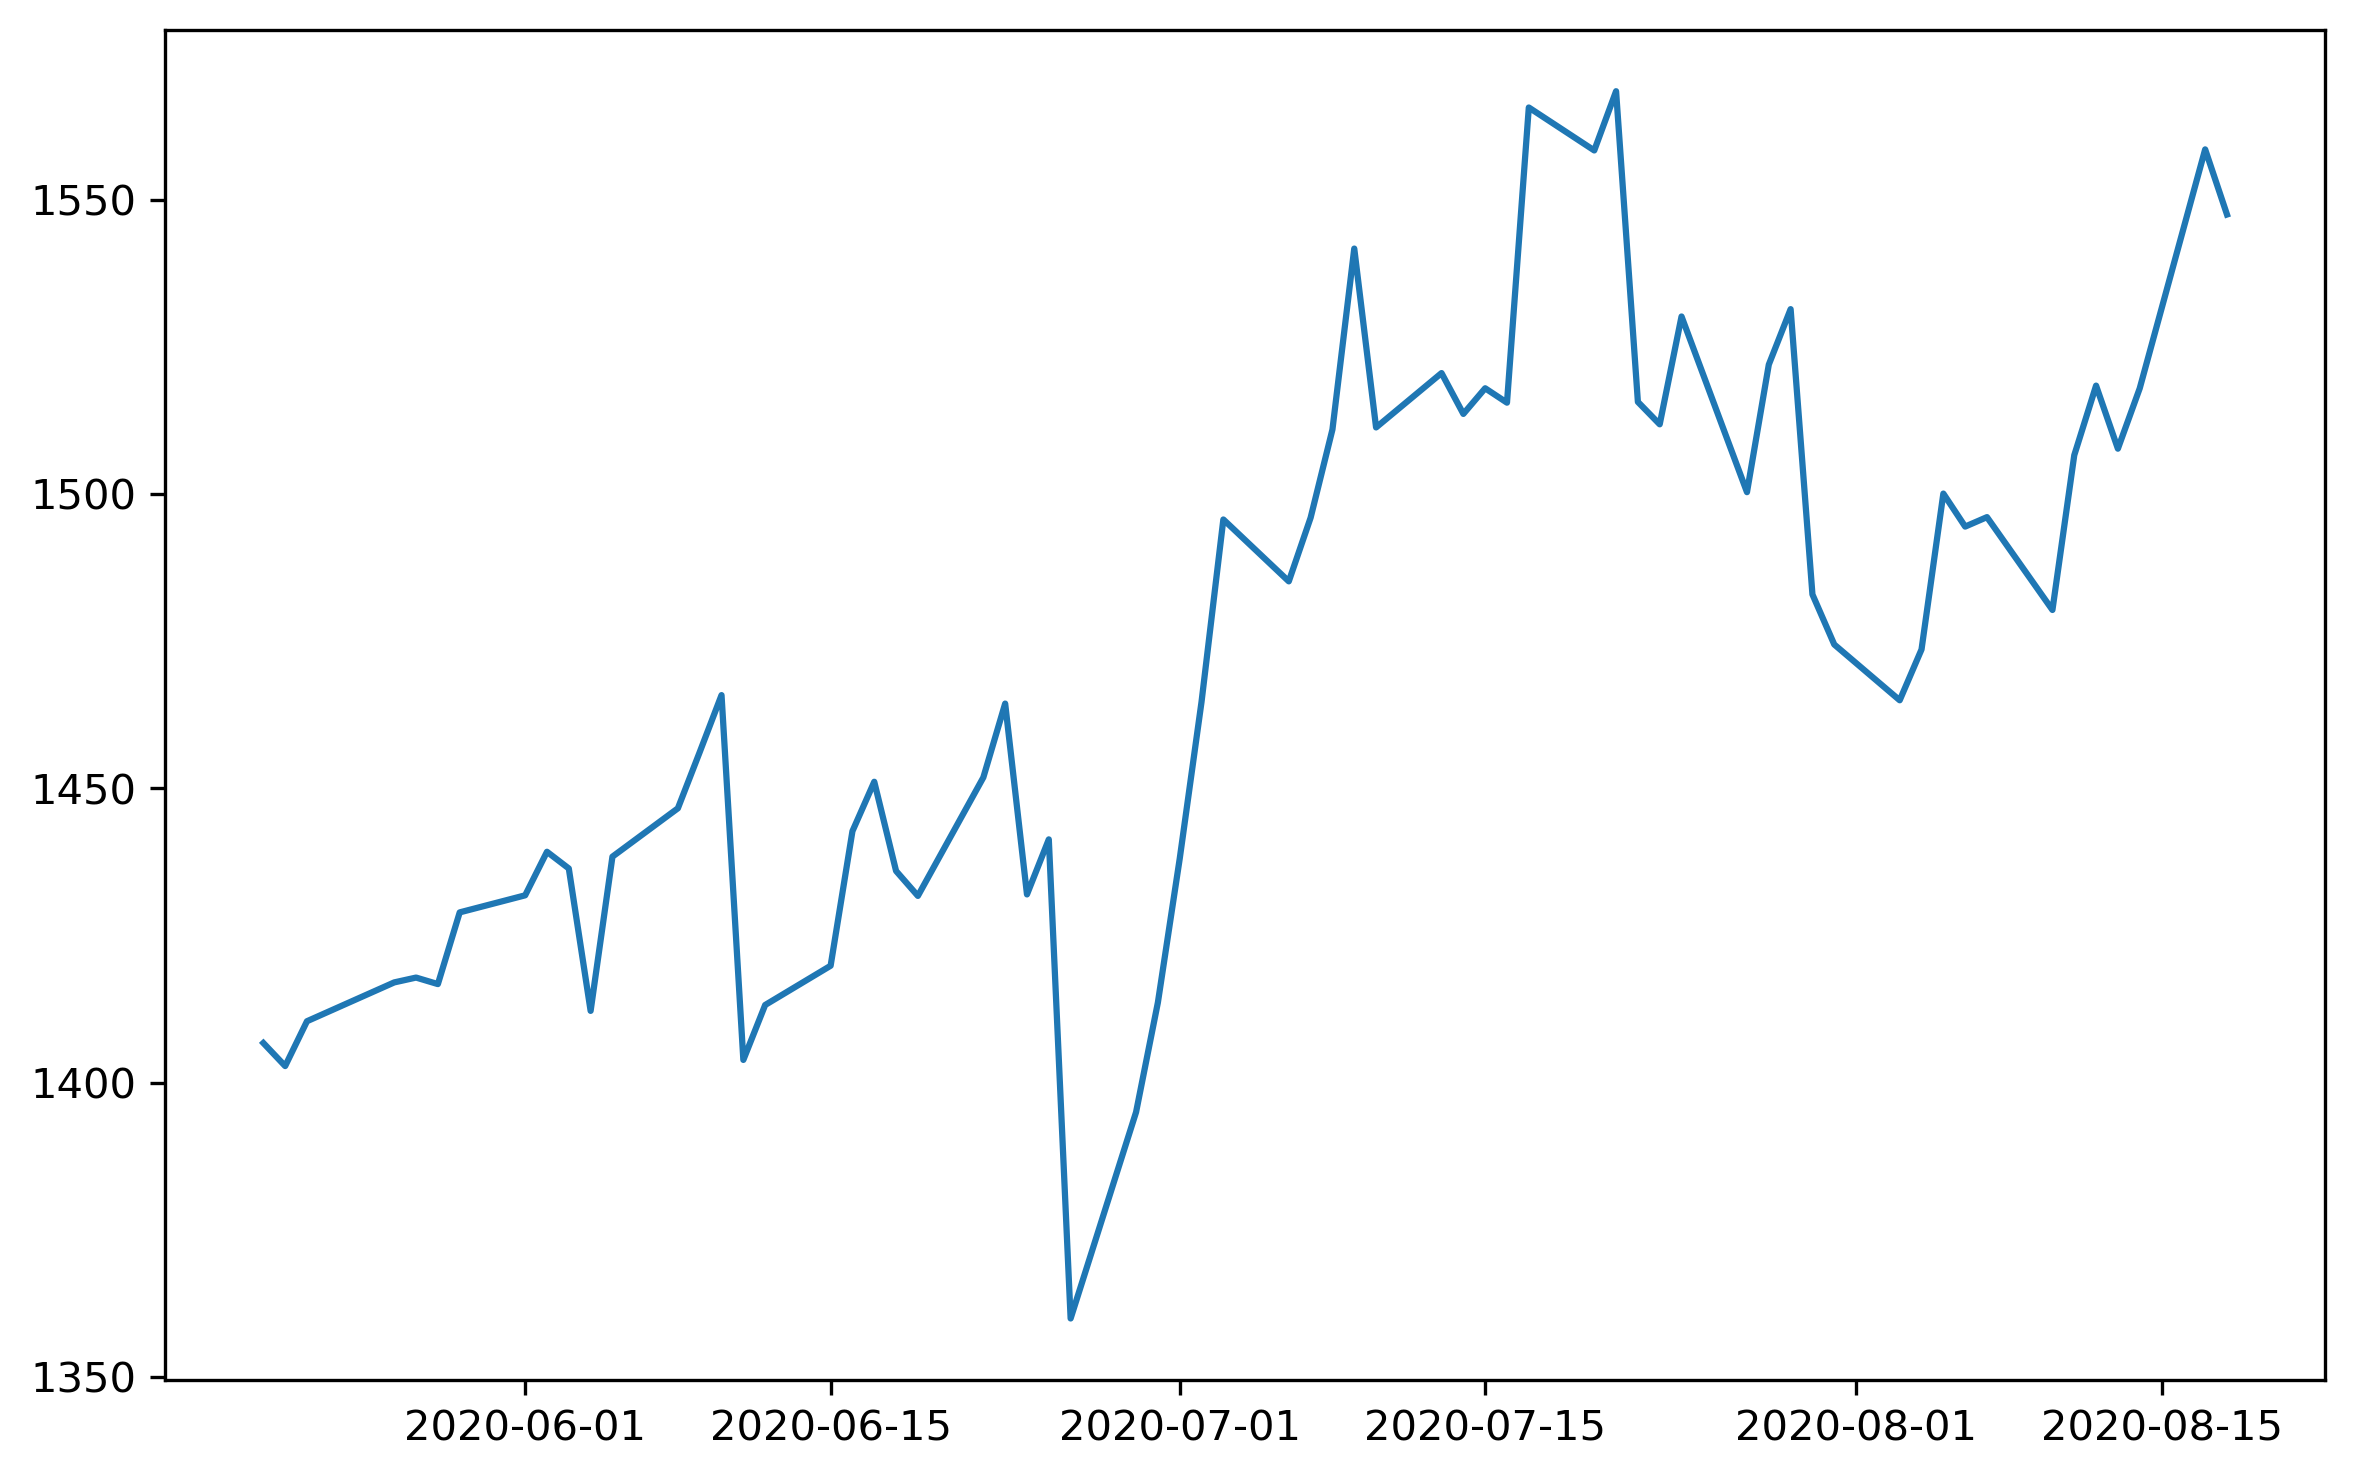

In [15]:
import datetime

goog_data = pd.read_csv('GOOG.csv')
goog_data_np = goog_data.to_numpy()
# get just close price
goog_cp = goog_data_np[:,4]
# exclude holidays
holidays = [datetime.datetime(2020,5,25), datetime.datetime(2020,8,19)]
date_arr = pd.bdate_range(start='5/20/2020', end='8/19/2020',
                         freq='C', holidays=holidays)

#date_arr = pd.bdate_range(start='5/21/2020', end='5/22/2020',
#                         freq='C', holidays=holidays)
#date_arr = pd.bdate_range(start='5/20/2020', end='8/19/2020', 
#                          freq='C',
#                         holidays=holidays)

date_arr_np = date_arr.to_numpy()

fig_7 = plt.figure(figsize=(8,5),dpi=300)
axes_7 = fig_7.add_axes([0.1, 0.1, 0.9, 0.9])

plt.plot(date_arr_np, goog_cp)

/home/swickape/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


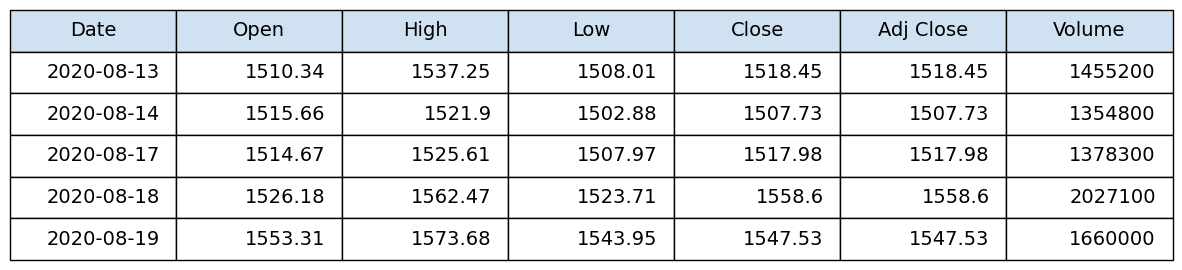

In [16]:
# in place replace all goog_data open values with float rounded to 2 decimals
goog_data['Open'] = pd.Series([round(val, 2) for val in goog_data['Open']],
                                                                  index = goog_data.index)
goog_data['High'] = pd.Series([round(val, 2) for val in goog_data['High']],
                                                                  index = goog_data.index)
goog_data['Low'] = pd.Series([round(val, 2) for val in goog_data['Low']],
                                                                  index = goog_data.index)
goog_data['Close'] = pd.Series([round(val, 2) for val in goog_data['Close']],
                                                                  index = goog_data.index)
goog_data['Adj Close'] = pd.Series([round(val, 2) for val in goog_data['Adj Close']],
                                                                  index = goog_data.index)
stk_data = goog_data[-5:]
col_head = ('Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
stk_data_np = stk_data.to_numpy()
plt.figure(linewidth=2, tight_layout={'pad':0.5}, figsize=(5,3))

axes_8=plt.gca()
axes_8.get_xaxis().set_visible(False)
axes_8.get_yaxis().set_visible(False)
plt.box(on=None)

# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

ccolors = plt.cm.Blues(np.full(len(col_head), 0.2))

the_table = plt.table(cellText=stk_data_np, loc='center', colLabels=col_head,
                      colColours=ccolors)

the_table.set_fontsize(14)
the_table.scale(3, 2.5)

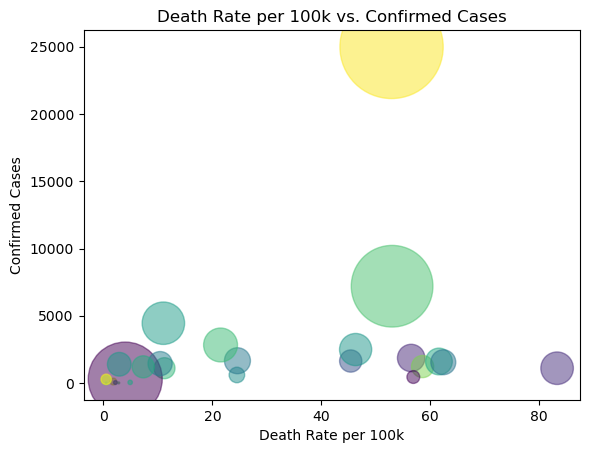

In [17]:
# Country array
cnt_arr = np.array(['Australia','Brazil','Canada','Chile','France','Germany','Greece',
                   'Iceland','India','Iran','Italy','Mexico','New Zealand','Nigeria',
                   'Norway','Pakistan','Peru','Russia','Saudi Arabia','Singapore',
                   'South Africa','Spain','Sweden','Turkey','UK','US'])
# Death rate per 100k Coronavirus
dr_arr = np.array([1.8,53,24.5,56.5,45.4,11.2,2.2,
                   2.8,4,24.6,58.6,46.3,.5,.5,
                   4.9,2.9,83.3,11,10.4,.5,
                   21.5,61.6,56.9,7.3,62.4,52.9])
# Daily confirmed cases (Tests)
test_arr = np.array([110,7197,600,1862,1636,1103,35,
                   10,295,1658,1226,2490,8,243,
                   48,1395,1101,4447,1443,280,
                   2830,1602,447,1205,1546,24988])
# Dot size Confirmed cases
cc_arr = np.array([24236,3456652,125408,390037,256534,229706,7684,
                   2035,2836925,350279,255278,537031,1654,50488,
                   10162,290445,549321,935066,302686,56031,
                   596060,370867,85411,253108,323008,5529824])

# shrink confirmed cases down to more manageable
cc_arr_sm = cc_arr / 1000
color_arr = np.random.rand(26)
plt.title('Death Rate per 100k vs. Confirmed Cases')
plt.xlabel('Death Rate per 100k')
plt.ylabel('Confirmed Cases')

# size of dots corresponds to our adjusted cc_arr_sm values, color is random, alpha (transparency) is 0.5 so we can see through dots
plt.scatter(dr_arr, test_arr, s=cc_arr_sm, c=color_arr, alpha=0.5)

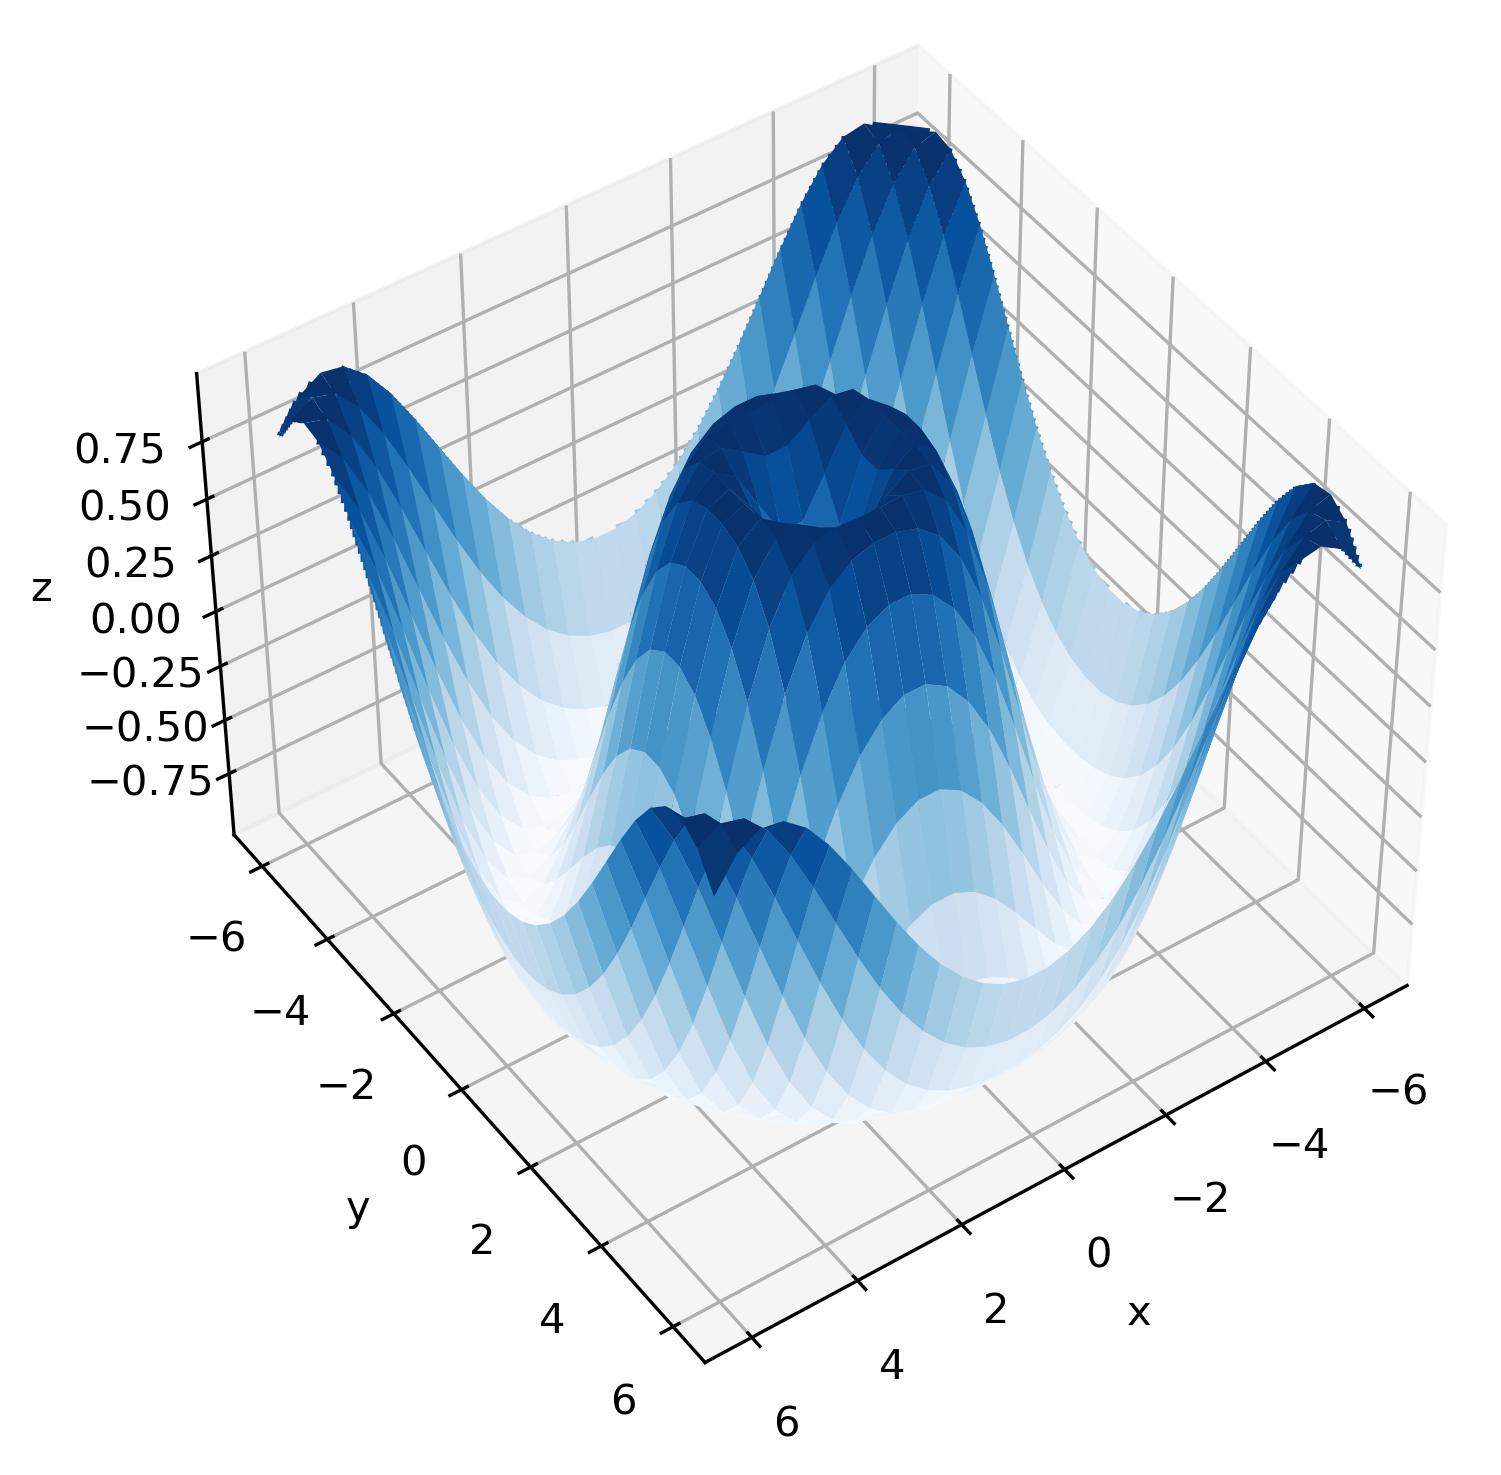

In [18]:
# 3D Surface
from mpl_toolkits import mplot3d

fig_9 = plt.figure(figsize=(8,5), dpi=300)
axes_9 = fig_9.add_axes([0.1, 0.1, 0.9, 0.9], projection='3d')

z_3 = 15 * np.random.random(100)
x_3 = np.sin(z_3) * np.random.randn(100)
y_3 = np.cos(z_3) * np.random.randn(100)

# a basic scatter plot, using cmap blues from earlier for colors
#axes_9.scatter3D(x_3, y_3, z_3, c=z_3, cmap='Blues')

# contour plot

def get_z(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

x_4 = np.linspace(-6, 6, 30)
y_4 = np.linspace(-6, 6, 30)

x_4, y_4 = np.meshgrid(x_4, y_4)
z_4 = get_z(x_4, y_4)

# change angle 45 degrees and rotate 55 degrees
axes_9.view_init(45, 55)


axes_9.set_xlabel('x')
axes_9.set_ylabel('y')
axes_9.set_zlabel('z')

# Here is a wireframe
#axes_9.plot_wireframe(x_4, y_4, z_4, color='blue')

# here is the contour plot
axes_9.contour3D(x_4, y_4, z_4, 80, cmap='Blues')

# here is a surface, basically wireframe with filled holes
axes_9.plot_surface(x_4, y_4, z_4, rstride=1, cstride=1, cmap='Blues', edgecolor='none')

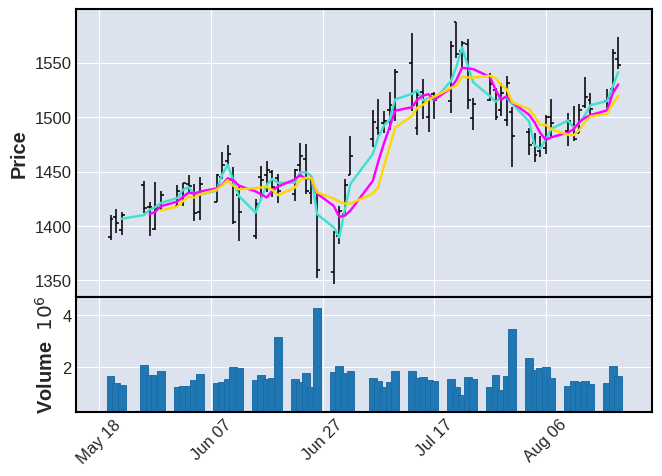

In [29]:
import mplfinance as mpf

goog_df = pd.read_csv('GOOG.csv', index_col=0, parse_dates=True)
goog_df.index.name = 'Date'

# candlestick plot
#mpf.plot(goog_df, type='candle')

# line plot
#mpf.plot(goog_df, type='line')

# trends OHLC chart moving average based on four days
#mpf.plot(goog_df, type='ohlc', mav=4)

# do this based on mav 3,5,7 days and add volume
mpf.plot(goog_df, type='ohlc', mav=(3,5,7), volume=True, show_nontrading=True)

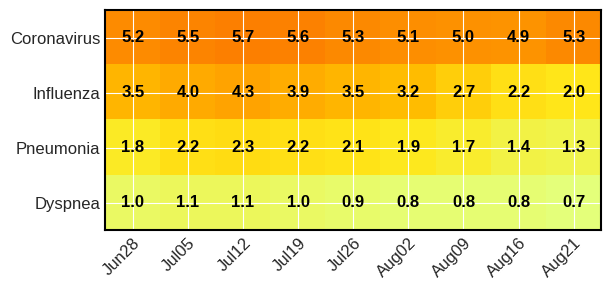

In [41]:
# Heatmaps

# A heatmap is a color coded representation of data from a 2D list
symptoms = ["Coronavirus","Influenza","Pneumonia","Dyspnea"]
dates = ["Jun28","Jul05","Jul12","Jul19","Jul26","Aug02","Aug09","Aug16","Aug21"]
symp_per = np.array([[5.2, 5.5, 5.7, 5.6, 5.3, 5.1, 5.0, 4.9, 5.3],
                    [3.5, 4.0, 4.3, 3.9, 3.5, 3.2, 2.7, 2.2, 2.0],
                    [1.8, 2.2, 2.3, 2.2, 2.1, 1.9, 1.7, 1.4, 1.3],
                    [1.0, 1.1, 1.1, 1.0, 0.9, 0.8, 0.8, 0.8, 0.7]])

fig_10, axes_10 = plt.subplots()
im = axes_10.imshow(symp_per, cmap='Wistia')
axes_10.set_xticks(np.arange(len(dates)))
axes_10.set_yticks(np.arange(len(symptoms)))
axes_10.set_xticklabels(dates)
axes_10.set_yticklabels(symptoms)
plt.setp(axes_10.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

for i in range(len(symptoms)):
    for j in range(len(dates)):
        text=axes_10.text(j, i, symp_per[i,j], ha='center', va='center', color='k', fontweight='bold')